In [10]:
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt #for plotting
import seaborn as sns
import re #for running rejecs on text data

In [14]:
pd.set_option('display.max_columns', 500)

# For plotting
from itertools import cycle

plt.style.use("ggplot")
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])


In [17]:
#loading Dataset
tweets = pd.read_csv('tweets.csv.zip')

In [20]:
tweets.shape 

(234186, 5)

In [23]:
tweets.head()

,wordle_id,tweet_id,tweet_date,tweet_username,tweet_text
0,210,1482553374591660037,2022-01-16 03:20:43+00:00,bpszebes,Wordle 210 4/6\n\n⬛⬛🟨🟨⬛\n🟩⬛⬛⬛⬛\n🟩🟩🟨⬛⬛\n🟩🟩🟩🟩🟩
1,210,1482553387937898499,2022-01-16 03:20:46+00:00,cruisecoup,Wordle 210 4/6\n\n⬜⬜⬜⬜⬜\n🟩🟩🟨🟨⬜\n🟩🟩⬜🟩🟨\n🟩🟩🟩🟩🟩
2,210,1482553422276698113,2022-01-16 03:20:55+00:00,DestroVega,Wordle 210 4/6\n\n⬜⬜⬜🟨⬜\n⬜🟩⬜🟨⬜\n⬜🟩⬜🟨⬜\n🟩🟩🟩🟩🟩
3,210,1482553436910628866,2022-01-16 03:20:58+00:00,brenmardash,Wordle 210 3/6\n\n⬜⬜🟨⬜⬜\n🟨🟨⬜⬜⬜\n🟩🟩🟩🟩🟩
4,210,1482553445726908420,2022-01-16 03:21:00+00:00,KatieHowse2,Wordle 210 3/6\n\n⬛⬛🟨⬛⬛\n🟩🟩🟩⬛⬛\n🟩🟩🟩🟩🟩


In [25]:
print(tweets['tweet_text'][0])

Wordle 210 4/6

⬛⬛🟨🟨⬛
🟩⬛⬛⬛⬛
🟩🟩🟨⬛⬛
🟩🟩🟩🟩🟩


In [49]:
def processing_tweets(tweets): #parsing tweet texts
    tweets['tweet_datetime'] = pd.to_datetime(tweets['tweet_date'])#proper datetime64 and storesi n new column
    tweets['tweet_date'] = tweets['tweet_datetime'].dt.date #takes date part from datetime and puts date in date
    tweets
    tweets['wordle_id']= tweets['tweet_text'].str[:10]
    tweets['attempts'] = tweets['tweet_text'].str[11].astype('int')
    tweets['Id'] = tweets['tweet_text'].str[7:10].astype('int')
    return tweets

tweets = processing_tweets(tweets)

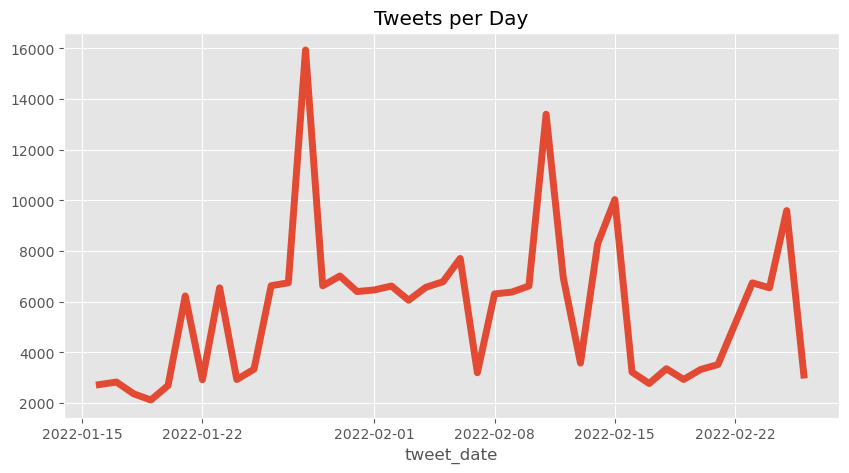

In [56]:
#tweets per day
tweets_per_day = tweets['tweet_date'].value_counts().sort_index() \
    .plot(figsize=(10, 5), title='Tweets per Day', lw=5)
plt.show()


In [69]:
# number of attempts
tweets.groupby('wordle_id')['attempts'].value_counts() \
.unstack()

attempts,2,3,4,5,6
wordle_id,,,,,
Wordle 210,222,897,1064,489,165
Wordle 211,196,903,1016,564,215
Wordle 212,191,787,820,413,188
Wordle 213,51,260,630,697,481
Wordle 214,383,1012,823,363,122
Wordle 215,246,877,1017,579,224
Wordle 216,461,1952,2078,1199,415
Wordle 217,102,566,1031,843,418
Wordle 218,170,1009,1384,730,187


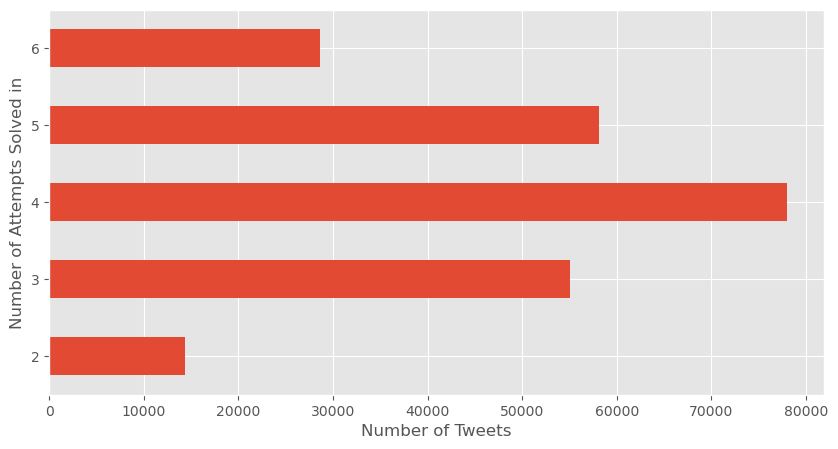

In [73]:
#how many attempts does it take to slove
tweets['attempts'].value_counts().sort_index().plot(kind='barh', figsize = (10,5))
plt.xlabel('Number of Tweets')
plt.ylabel('Number of Attempts Solved in')
plt.show()

In [ ]:
#parsing tweets 
tweets['tweet_text'] = tweets['tweet_text'].str.replace('⬜','⬛')#for consistency 

In [ ]:
#guess number of attempts
def parse_tweet_text(tweets):
    for n in range (6):
        n = 1 #guess number

        tweets[f'has_guess{n}'] = tweets['tweet_text'].str.split('\n').str[n+1] \
        .str.contains("|".join(['🟨','⬛','🟩'])) \
        .fillna(False)

        #parse out tweet text 
        tweets.loc[tweets[f'has_guess{n}'], f'guess{n}'] = \
            tweets['tweet_text'].str.split('\n').str[n + 1].str[:5] #parse out tweet text

        # counting number of 🟨, ⬛, 🟩 (in each line) 
        tweets.loc[tweets[f'has_guess{n}'],
                f'guess{n}_incorrect'] = tweets[f'guess{n}'].str.count('⬛')
        tweets.loc[tweets[f'has_guess{n}'],
                f'guess{n}_wrong_spot'] = tweets[f'guess{n}'].str.count('🟨')
        tweets.loc[tweets[f'has_guess{n}'],
                f'guess{n}_correct'] = tweets[f'guess{n}'].str.count('🟩')
        tweets.loc[tweets[f'guess{n}_correct'] == 6, 'final_guess'] = n
        return tweets
    
tweets = parse_tweet_text(tweets)

In [113]:
#keping extra wording in tweets
tweets['additional_text'] = \
    tweets.loc[~tweets['tweet_text'] \
    .str.split('\n').str[-1].str.contains('🟩')] \
    ['tweet_text'].str.split('\n').str[-1]

In [ ]:
#ploting
fig, 